<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/PyTorch/Custom_Datasets_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Custom Datasets



```
# This is formatted as code
```

### Importing Modules and Setting Up Device-Agnostic Code

In [16]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [18]:
device

'cuda'

In [19]:
!nvidia-smi

Thu Aug 24 17:54:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Getting Data

In [20]:
import requests
import zipfile
from pathlib import  Path
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exist")
else:
  print(f"{image_path} does not exist")
  image_path.mkdir(parents=True,exist_ok=True)
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading")
  f.write(request.content)

#Unzip Data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza,steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exist
Downloading
Unzipping pizza,steak and sushi data...


### Becoming one with the data

In [21]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

--2023-08-24 17:54:42--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2023-08-24 17:54:42 (106 MB/s) - ‘helper_functions.py.1’ saved [10160/10160]



In [22]:
from helper_functions import walk_through_dir

In [23]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [24]:
train_dir = image_path/"train"
test_dir = image_path/"test"

### Visualizing and Image

In [25]:
import random
from PIL import Image

def plot_random_sample(image_path):
  image_path_list = list(image_path.glob("*/*/*.jpg"))
  random_image_path = random.choice(image_path_list)
  image_class = random_image_path.parent.stem
  img = Image.open(random_image_path)
  plt.imshow(img)
  plt.title(image_class)
  plt.axis(False)

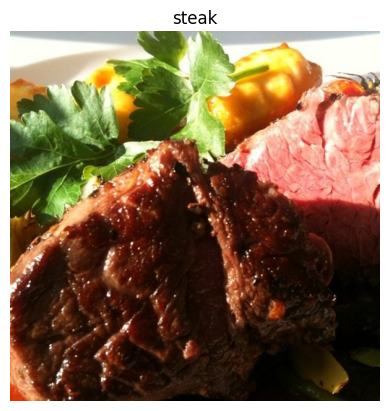

In [26]:
plot_random_sample(image_path)

### Transforming Data

In [27]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [28]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

### Loading image using ImageFolder

In [29]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir)

In [30]:
class_names = train_data.classes

### Turning Loaded Images into DataLoader

In [31]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(train_data,batch_size = BATCH_SIZE,num_workers=os.cpu_count(),shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,num_workers=os.cpu_count())

In [32]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8de0517820>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8de0517430>)

In [35]:
len(train_dataloader),len(test_dataloader)

(8, 3)

### Other forms of Transforms

In [37]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

### TinyVGG without Data Augmentation

In [38]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor(),
])


In [39]:
train_data = datasets.ImageFolder(root=train_dir,transform=simple_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir)

In [40]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(train_data,batch_size = BATCH_SIZE,num_workers=os.cpu_count(),shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,num_workers=os.cpu_count())

In [58]:
from torch import nn
class TinyGGModelV0(nn.Module):
  def __init__(self,in_features,out_features,hidden_units=8):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_features,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*10*10,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=out_features)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    return self.classifier(x)

In [59]:
torch.manual_seed(42)
model_0 = TinyGGModelV0(3,3,10).to(device)

In [60]:
image,label = next(iter(train_dataloader))

In [61]:
image = image.to(device)